## KNN (분류, 예측 모델)

- 1. `K`-Nearest Neighbors : 학습데이터의 별도 학습 과정이 없다. 미리 저장되어 있는 학습데이터에 예측데이터를 대조 => '메모리 기반학습'
    - 장점 : 쉽고 직관적이다.
    - 단점 : 변수가 100개이상으로 많아지거나, 데이터양이 커지게 되면 연산량 증가가 다른 모델보다 훨씬 크기 때문에 다소 비효율적이다. (= 대량의 데이터를 다루는 분석프로젝트에는 적절하지 않음.)

- 2. `K` : K는 양의 정수로 다양하게 세팅가능. 통상적으로 10이하로 맞춰준다. 
    - ex. 1NN : 하나의 근접한 학습데이터로 분류하는 모델. 
    - K가 너무 크면 전체 범주의 분포의 영향을 많이 받게 되고 관련이 적은 먼 곳의 데이터가 분류에 영향을 미치게 된다. K가 너무 작으면 이상치의 영향을 많이 받고 패턴이 직관적이지 못하다.
    - 최적의 K 찾기 : 교차검증(cross validation) 실시! = K수를 1부터 계속 늘려가며, 검증 데이터의 오분류율이 어떻게 변화하는지 관찰 -> 오분류율이 가장 낮았던 지점의 K를 선정하면 된다. 
    ![k찾기](./최적의k.png)

- 3. KNN은 데이터의 지역구조(local structure)에 민감한 특성을 가지고 있다. 
    - 단점 : 범주의 분포가 편향되어 있을 경우에는 예측 데이터의 관측치들이 빈도 높은 범주로 쏠린다. 
    - 동률의 범주가 생겨 분류를 할 수 없는 상황을 방지하기 위해 이진분류의 경우 홀수의 K를 설정하는 것이 좋다. 

- 4. 가중치 : 거리에 따라 가중치의 크기 조절
    - 가장 흔한 방법 : d가 이웃 관측치까지의 거리일 때 각각의 관측치에 거리의 역수 1/d를 가중치로 하는 것. (1/d) / 예시 : 거리가 5-> 0.2, 10 -> 0.1 w
    - 그 외 방법
     ![knn_w](./knn_w.png) 
    - 교차검증(cross validation)을 통해 최적의 알고리즘을 선택해야한다. 

- 5. $d$ 거리 구하는 방법 : 유클리드 거리
    - 거리를 사용하기 때문에 데이터 정규화나 표준화를 반드시 해줘야 한다.

- 6. 종속변수가 연속형 변수인 경우에는 회귀나무처럼 KNN회귀를 한다. 
    - 이웃한 K개 관측치의 평균값을 계산하면 된다. 
    - 회귀의 경우, K를 너무 적게 설정하면 학습데이터에 너무 의존된 모델이 되어 일반화가 어려워진다. 그래서 안정된 예측모델을 만들기 위해서는 학습 데이터셋에서 정확도가 다소 떨어지더라도 K를 3이상으로 설정해주는 것이 좋다.


## KNN 실습

1. 필요한 패키지 설치 및 임포트

In [2]:
!pip install mglearn

In [3]:
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

2. 데이터 불러오기 및 확인

In [4]:
# 데이터 불러오기
df = pd.read_excel('./Raisin_Dataset/Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


3. 독립변수 정규화 스케일링 및 학습셋과 테스트셋 생성

In [5]:
x = df.drop(['Area', 'Class'], axis='columns')
y = df[['Class']]

# 독립변수 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(x)

# 학습셋, 테스트셋 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.6, test_size=0.4)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수:', len(x_train))
print('test data 개수:', len(x_test))

train data 개수: 540
test data 개수: 360


4. 기본 KNN 모델 생성 및 정확도 확인

In [6]:
# 모델 생성
classifier = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='minkowski')
classifier.fit(x_train, y_train)

# 정확도
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.9
0.7361111111111112


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


•algorithm : 가장 가까운 이웃을 계산하는데 사용하는 알고리즘으로 auto 는 fit 메소드에서 전달된 값을 기반으로 가장 적합한 알고리즘을 결정하려고 시도하는 것 입니다. (그 외 ball_tree, kd_tree, brute)


•Leaf_size : ballTree 나 kd_tree에 전달하는 leaf의 크기로,  default 값은 30입니다.트리에서 몇 대 몇으로 나눠서 뻗어 나갈지를 나타내는 값으로 Leaf size가 너무 작으면, 가지 수가 너무 많아 짐에 따라 노이즈가 끼기 쉽고 속도가 느리다. Leaf size가 너무 크면, 너무 대충 분류해서 예측 성능이 낮아진다.


•metric: 거리 측정 방식을 변경하는 매개변수로 default 값은 minkowsi 입니다. 
    - minkoski는 기존의 유클리디안거리와 맨해튼거리 계산 공식을 하나로 표현한 것. 
    - p: minkowski 의 매개변수
    - p=1일때 맨해튼 거리,  p=2 일때 유클리디안 거리


•metric_params: 메트릭 함수의 추가 키워드로 기본값은 None 이다


•n_jobs: 이웃을 검색하기 위해 실행하는 병렬 작업 수


•n_neighbors: 검색할 이웃의 수로 default 값은 5입니다.


•Weights 는 예측에 사용하는 가중치로 uniform 은 각 이웃에 동일한 가중치를 , ‘distance’는 가까운 이웃이 멀리 있는 이웃보다 더욱 큰 영향을 미친다.

5. 이웃 k옵션 1~30의 모델 생성(거리 가중치 미적용)

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classif

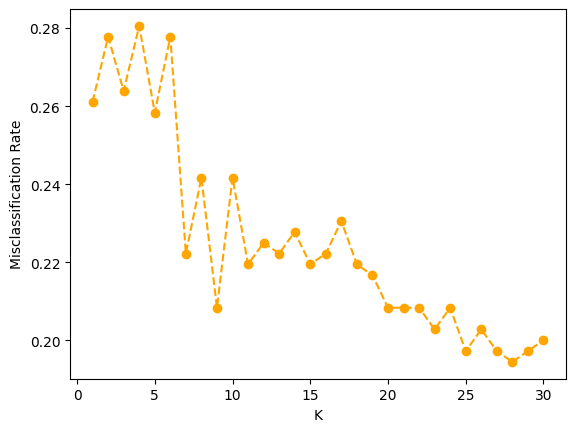

In [11]:
# k 수 범위 지정
k_num = range(1,31)

accuracies = []

for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test)) #오분류율

# 그래프 옵션 변경
plt.plot(k_num, accuracies, 'o--', color='orange') #x축=k_num, y축=accuracies
plt.xlabel("K")
plt.ylabel("Misclassification Rate")
# plt.ylim(0.14, 0.22)
plt.show()

6. 이웃 k옵션 1~30의 모델 생성(거리 가중치 적용)

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classif

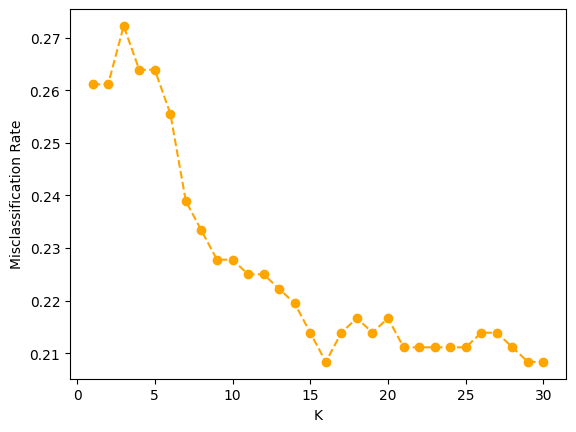

In [13]:
# k 수 범위 지정
k_num = range(1,31)

accuracies = []

for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors=k, weights='distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test)) #오분류율

# 그래프 옵션 변경
plt.plot(k_num, accuracies, 'o--', color='orange') 
plt.xlabel("K")
plt.ylabel("Misclassification Rate")
# plt.ylim(0.14, 0.22)
plt.show()


> 거리 가중치를 적용한 모델이 전체적으로 오분류율, 변동성이 감소

7. 이웃 k 옵션 1~200의 모델 생성(거리 가중치 적용)

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classif

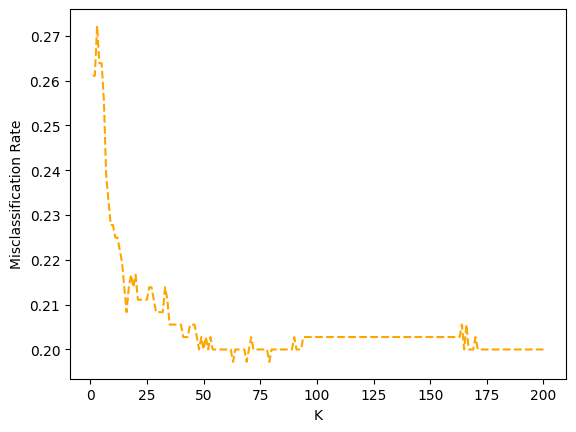

In [10]:
k_num = range(1,201)

accuracies = []

for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors=k, weights='distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1-k_num_model_2.score(x_test, y_test)) #오분류율

# 그래프 옵션 변경
plt.plot(k_num, accuracies, '--', color='orange') 
plt.xlabel("K")
plt.ylabel("Misclassification Rate")
# plt.ylim(0.13, 0.17)
plt.show()

> 이웃수가 늘어날수록 오분류율이 감소하는 것은 아니다. k를 200까지 증가시켜 오분류율을 시각화한 결과, 50개 지점부터 오분류율이 증가하는 것으로 확인. 따라서 KNN은 적정한 이웃 수(K)를 찾아내는 것이 중요하다.

8. 결정경계선 시각화를 위한 차원축소

In [14]:
# 주성분 개수 설정(2개설정)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_test)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns=['C1', 'C2'])
df_pca.head()

,C1,C2
0,-5250.491037,55.031514
1,26968.293432,48.962538
2,-6240.736601,11.372880
3,-14460.161183,-9.475483
4,91328.621918,15.460864


9. 이웃 수 k에 따른 결정경계선 차이 시각화화

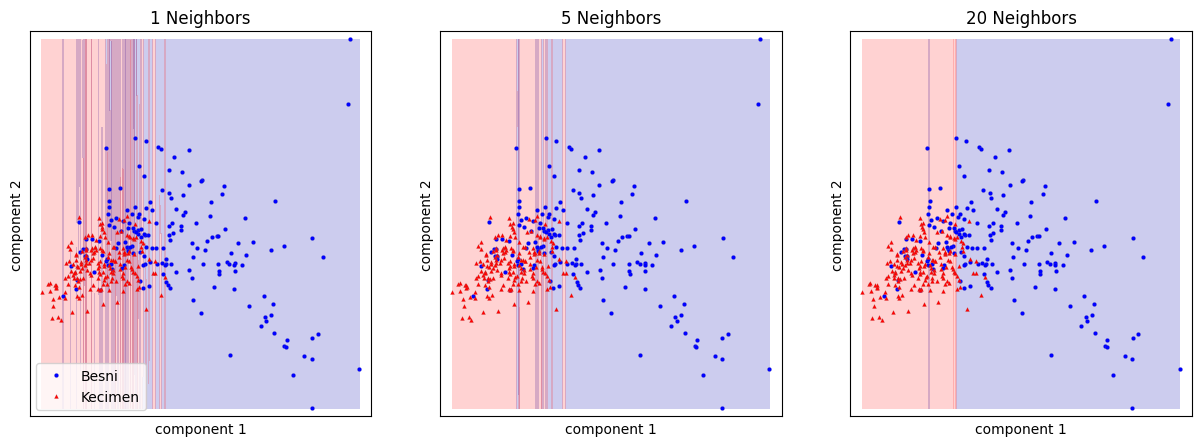

In [18]:
# 독립변수, 종속변수 전처리
df_vsl_x = df_pca.to_numpy()
df_vsl_y = y_test['Class'].to_numpy()

# 그래프 설정
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig, axes = plt.subplots(1,3,figsize=(15,5))

# 이웃 수 1,5,20 에 따른 결정경계 시각화
for n_neighbors, ax in zip([1,5,20], axes):
    k_num_model_eg = KNeighborsClassifier(n_neighbors=n_neighbors).fit(df_vsl_x, df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg, df_vsl_x, fill=True, eps=0.5, ax=ax, alpha=.2)
    mglearn.discrete_scatter(df_vsl_x[:, 0], df_vsl_x[:, 1], df_vsl_y, markeredgewidth=0.1, c=['b','r'], s=3, ax=ax)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_title("{} Neighbors".format(n_neighbors))

axes[0].legend(loc=3)

> 